# Visualizing a Complex Function

### Defining the variables and functions

Define here the function to visualize.  If you change $f$, hit "Restart and Run All Cells" to redo the visualizations below.

In [1]:
f(z)=(z+1/z)/2

The corresponding scalar fields $u, v$ can be calculated from the defintion of $f$.

In [2]:
var('z w x y u v t')
assume(x,'real')
assume(y,'real')
u(x,y)=real_part(f(x+I*y))
u(x,y).show()

1/2*x + 1/2*x/(x^2 + y^2)

In [3]:
v(x,y)=imag_part(f(x+I*y))
v(x,y).show()

1/2*y - 1/2*y/(x^2 + y^2)

## Mapping a Cartesian grid

One way to visualize $f$ as a transformation of the plane: Take a grid of $z$-values and map to the corresponding curvy gride of $w$-values, where $w=f(z)$.

In [4]:
# Enter parameters for the input and output windows and the grid to be mapped
window_left=-.5
window_right=1.5
window_lower=-.5
window_upper=1.5
grid_res=0.1
grid_lower=0.01
grid_upper=1.01
grid_left=0.01
grid_right=1.01

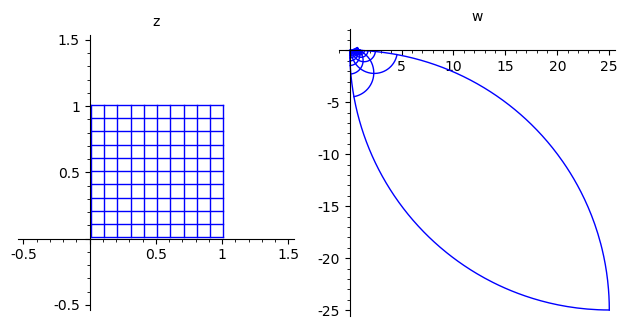

In [5]:
# Calculate and display input and output grids
num_vertical = int((grid_right-grid_left)/grid_res) #number of vertical lines in the grid
num_horizontal = int((grid_upper-grid_lower)/grid_res) #number of horizontal lines
G=line([(window_left,window_lower),(window_left,window_upper),(window_right,window_upper),(window_right,window_lower)],thickness=0,aspect_ratio=1,title='z')
H=line([(window_left,window_lower),(window_left,window_upper),(window_right,window_upper),(window_right,window_lower)],thickness=0,aspect_ratio=1,title='w')
for j in range(num_vertical+1): 
    xcoord = grid_lower + j*grid_res
    vert_line = line([(xcoord,grid_lower),(xcoord,grid_upper)])
    vert_curve = parametric_plot( (u(xcoord,t), v(xcoord,t)), (t, grid_lower, grid_upper)) #map the vertical line
    G += vert_line 
    H += vert_curve
for j in range(num_horizontal+1): 
    ycoord = grid_left + j*grid_res
    horiz_line = line([(grid_left,ycoord),(grid_right,ycoord)])
    horiz_curve = parametric_plot( (u(t,ycoord), v(t,ycoord)), (t,grid_left,grid_right) )  # map the horizontal line
    G += horiz_line 
    H += horiz_curve
graphics_array((G,H))

## Mapping a polar grid

Another way to understand $f$ is to instead start with a polar grid.

In [6]:
polar_window_left=-.5
polar_window_right=1.5
polar_window_lower=-.5
polar_window_upper=1.5
angle_grid_res=2*pi/20
radial_grid_res=0.1
grid_inner=0.1
grid_outer=1.1 
angular_lower=0
angular_upper=2*pi

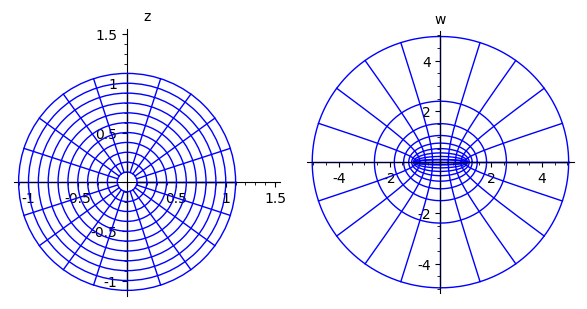

In [7]:
num_radial = int((grid_outer-grid_inner)/radial_grid_res) #number of radial "lines" (i.e. circles) in the grid
num_angular = int((angular_upper-angular_lower)/angle_grid_res) #number of angular lines (i.e. lines through origin) in grid
GP=line([(window_left,window_lower),(window_left,window_upper),(window_right,window_upper),(window_right,window_lower)],thickness=0,aspect_ratio=1,title='z')
HP=line([(window_left,window_lower),(window_left,window_upper),(window_right,window_upper),(window_right,window_lower)],thickness=0,aspect_ratio=1,title='w')
for j in range(num_radial+1): 
    radius = grid_inner+j*radial_grid_res
    circ = circle((0,0),radius)
    mapped_circ = parametric_plot( (u(radius*cos(t),radius*sin(t)), v(radius*cos(t),radius*sin(t))), (t, 0, 2*pi)) #map the circle
    GP += circ 
    HP += mapped_circ
for j in range(num_angular+1): 
    ang = j*angle_grid_res
    rad_line = line([(grid_inner*cos(ang),grid_inner*sin(ang)),(grid_outer*cos(ang),grid_outer*sin(ang))])
    mapped_rad = parametric_plot( (u(t*cos(ang),t*sin(ang)), v(t*cos(ang),t*sin(ang))), (t,grid_inner,grid_outer) )  # map the horizontal line
    GP += rad_line #line_list.append(vert_line)
    HP += mapped_rad
graphics_array((GP,HP))

## Mapping an arbitrary curve

In this cell you can define any line or curve in the plane by a parametric equation, and then see what it maps to.

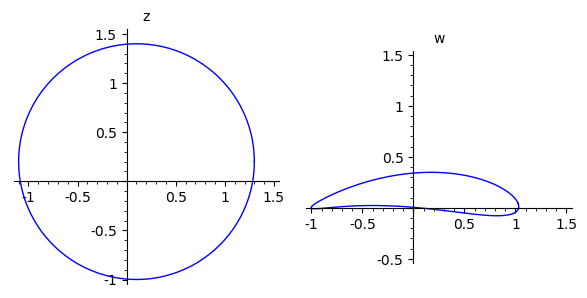

In [8]:
par_x=.1 + 1.2*cos(t) #parametric x equation of the input curve chosen
par_y=.2 + 1.2*sin(t) #parametric y equation of the input curve chosen
tmin=0
tmax=2*pi #parameter range for input curve
input_curve=parametric_plot( (par_x, par_y), (t, tmin, tmax)) 
output_curve=parametric_plot( (u(par_x, par_y),v(par_x,par_y)), (t, tmin, tmax)) 
GP2=line([(window_left,window_lower),(window_left,window_upper),(window_right,window_upper),(window_right,window_lower)],thickness=0,aspect_ratio=1,title='z')
HP2=line([(window_left,window_lower),(window_left,window_upper),(window_right,window_upper),(window_right,window_lower)],thickness=0,aspect_ratio=1,title='w')
GP2 += input_curve
HP2 += output_curve
graphics_array((GP2,HP2))

## Domain Coloring

In the last decade or two, it has become standard to visually represent a complex function by coloring.  The magnitude of the output is indicated by the brightness (with zero being black and infinity being white) while the argument is represented by the hue (with red being positive real, and increasing through orange, yellow, … as the argument increases).

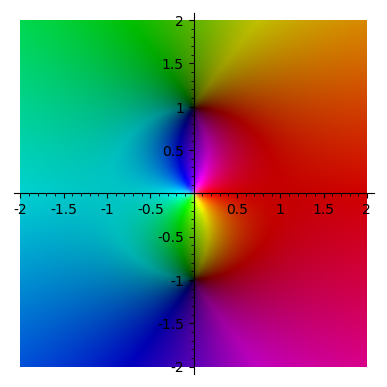

In [9]:
complex_plot(f,(-2,2),(-2,2),aspect_ratio=1)

## Vector Field Plot
If one identifies $\mathbb{C}$ with the plane, then a function from $\mathbb{C}$ to itself is equivalent to a function from the plane to itself, which can be identified with a vector field.  For reasons we'll get to later when exploring the connection between complex integrals and line integrals of vector fields, it makes sense to look at the vector field identified with the **conjugate** function $\overline{f(z)}$.

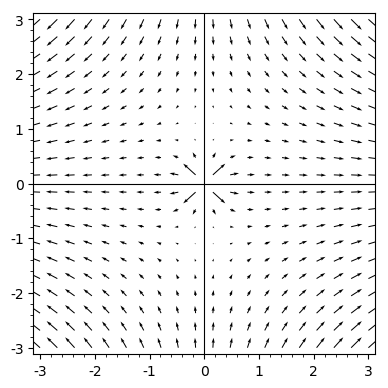

In [10]:
plot_vector_field((u(x,y),-v(x,y)), (x,-3,3), (y,-3,3),aspect_ratio=1)

## Surface plots of $u$ and $v$

The real and imaginary parts of $f$ are scalar fields in two variables, so each has a graph which is a surface in 3-dimensional space.  Plotting both is one way to visually understand $f$.

In [11]:
width=.7
plot3d(u(x,y),(x,-width,width),(y,-width,width),color='orange',mesh=true,axes=true,aspect_ratio=(1,1,1))

Graphics3d Object

In [12]:
plot3d(v(x,y),(x,-width,width),(y,-width,width),color='green',mesh=true,axes=true,aspect_ratio=(1,1,1))

Graphics3d Object

## Surface plot of $|f|$

Representing a complex function by a surface plot means throwing away one dimension of output, i.e. choosing a real number to represent the complex number.  Another way to do this is to plot $|f|$ in lieu of a plot of $f$.  (In principle, you could plot the argument as well, but that's less often done.)

In [13]:
plot3d(sqrt(u(x,y)^2+v(x,y)^2),(x,-width,width),(y,-width,width),color='brown',mesh=true,axes=true,aspect_ratio=(1,1,1))

Graphics3d Object

## Contour plots of $u$ and $v$

Rather than representing $u, v$ by surface plots, we can draw their contours.  This has several advantages.  First, it's one of the few methods that's feasible to do by hand.  Second, if we draw the contour plots on top of each other, we can see the orthogonality relationship implied by the Cauchy-Riemann equations.

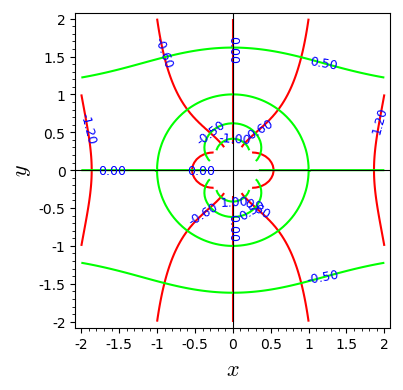

In [18]:
cwidth=2
num_contours=5
region_description=x^2+y^2-.1 #plot restricted to where this is positive...can exclude blowups...can set to positive constant if not an issue
uc=contour_plot(u,(x,-cwidth,cwidth),(y,-cwidth,cwidth),contours=num_contours,axes=true,axes_labels=['$x$','$y$'],cmap=[(1,0,0)],labels=True,fill=False,region=region_description)
vc=contour_plot(v,(x,-cwidth,cwidth),(y,-cwidth,cwidth),contours=num_contours,axes=true,axes_labels=['$x$','$y$'],cmap=[(0,1,0)],labels=True,fill=False,region=region_description)
uc+vc